# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [12]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [13]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [14]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 4

#### Question 2. Create a summary table

In [17]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: because there is a larger range of values for GRE than GPA

#### Question 4. Drop data points with missing data


In [20]:
df_null_drop = df_raw.dropna()
df_null_drop

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [24]:
df_null_drop.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [25]:
df_null_drop.isnull().any()

admit       False
gre         False
gpa         False
prestige    False
dtype: bool

Answer: in the summary table, can see the new dataframe now has the same count of values across all columns. Also verified that no column contains a null value with .isnull().any()

#### Question 6. Create box plots for GRE and GPA

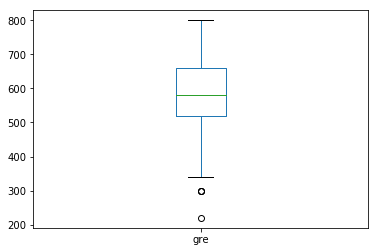

In [32]:
#boxplot 1
df_null_drop['gre'].plot(kind='box')

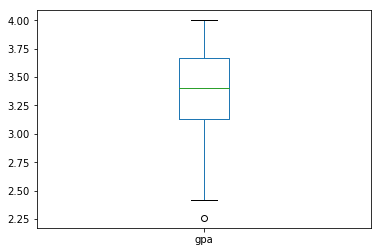

In [34]:
#boxplot 2 
df_null_drop['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: range of data, mean and quartiles. Initially indicate a normal distribution for gre but a skew to gpa. 

#### Question 8. Describe each distribution 

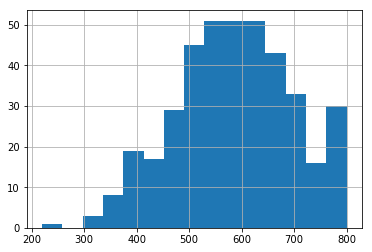

In [43]:
# plot the distribution of each variable 
df_null_drop['gre'].hist(bins=15)

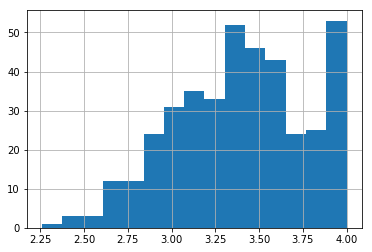

In [42]:
df_null_drop['gpa'].hist(bins=15)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [47]:
from scipy import stats
stats.normaltest(df_null_drop)

NormaltestResult(statistic=array([ 2203.82079872,     3.81798293,    13.07987556,    49.42125322]), pvalue=array([  0.00000000e+00,   1.48229806e-01,   1.44457838e-03,
         1.85486036e-11]))

Answer: no 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: yes, if we want to run statistical analyses that assume a normal distribution like ANOVA; no, if we can use a model that does not require a normal distribution, like Mann Whitney. If we need to correct the data, we can drop extreme values / outliers. 

#### Question 11. Which of our variables are potentially colinear? 

In [48]:
# create a correlation matrix for the data
df_null_drop.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: gre and gpa may be colinear

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
- assess the distribution of prestige data to determine which statistical test will be best
- run the appropriate statistical test (e.g., a Mann Whitney test if the data is not normally distributed)
- if the p value is less than 0.05 we will determine that there is a significant association between grad school admissions rates and prestige of undergraduate schools

#### Question 14. What is your hypothesis? 

Answer: there is a negative correlation between grad school admissions rates and prestige of undergraduate schools (where lower prestige values indicate higher ranked schools). 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data